In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy as scp

import nltk
from nltk.corpus import wordnet as wn
from itertools import product

%matplotlib inline

headers = ['age','workclass','fnlwgt','education','education-num','marital-status',
           'occupation','relationship','race','sex','capital-gain','capital-loss',
           'hours-per-week','native-country','class']
adult = pd.read_csv('./datasets/adult.data', 
                    sep=', ', names=headers, na_values='?', engine='python')

In [257]:
# Drop all records with missing values
adult.dropna(inplace=True)
adult.reset_index(drop=True, inplace=True)

# Drop fnlwgt, not interesting for ML
adult.drop('fnlwgt', axis=1, inplace=True)
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
age               30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
class             30162 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


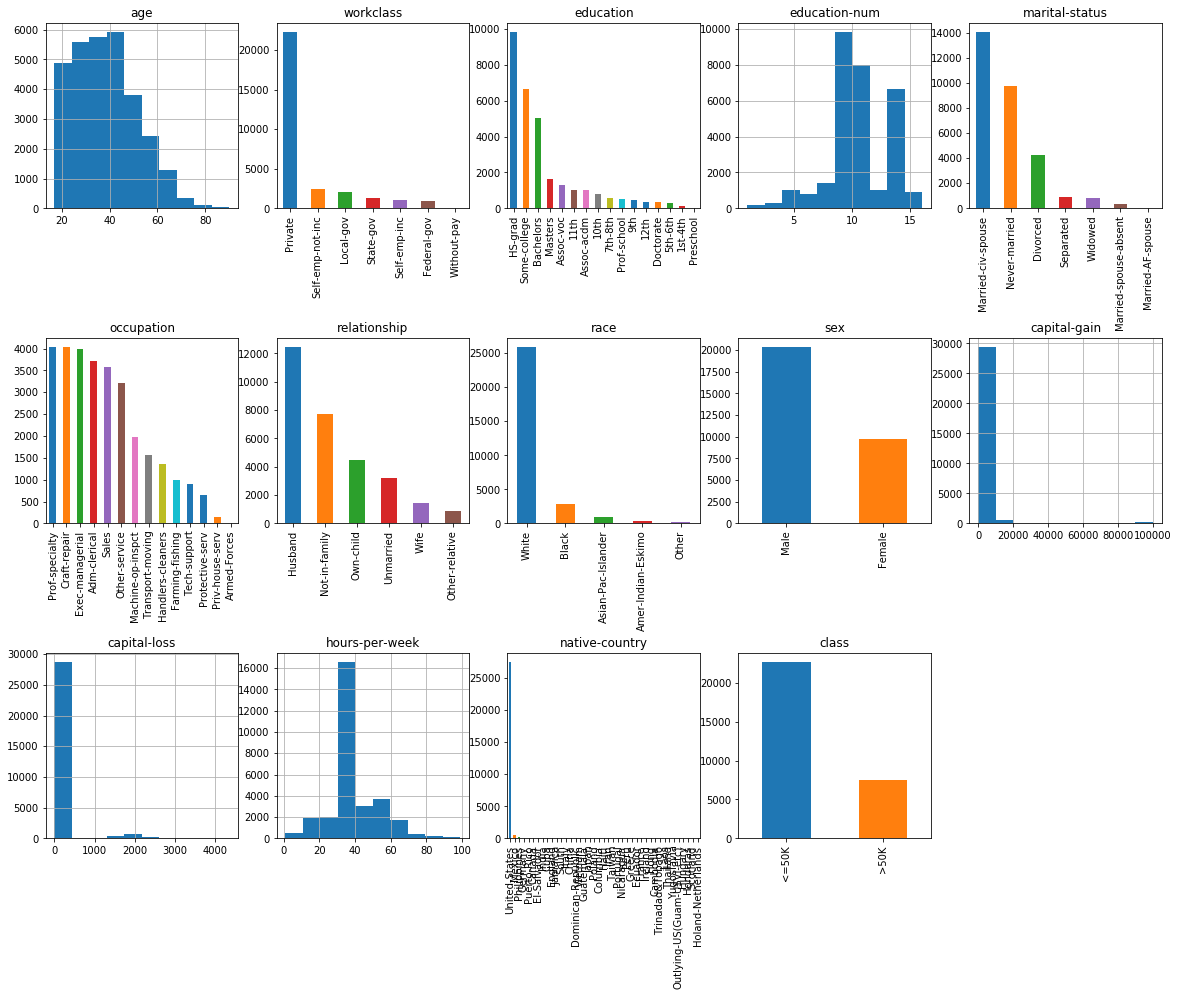

In [258]:
import math
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(adult.shape[1]) / cols)
for i, column in enumerate(adult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult.dtypes[column] == np.object:
        adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult[column].hist(axes=ax)
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [259]:
# Convert objects to categories
# Education is ordered
ordered_education = ['Preschool','1st-4th','5th-6th','7th-8th','9th',
                    '10th','11th','12th','HS-grad','Assoc-acdm',
                     'Assoc-voc','Some-college','Bachelors','Prof-school',
                     'Masters','Doctorate']
adult['education'] = adult['education'].astype(pd.api.types.CategoricalDtype(categories=ordered_education, ordered=True))

#Hours per week is

# The rest are not
obj_columns = adult.select_dtypes(['object']).columns
adult[obj_columns] = adult[obj_columns].astype('category')

In [260]:
# Convert numerics to floats and normalize
num_columns = adult.select_dtypes(['int64']).columns
adult[num_columns] = adult[num_columns].astype('float64')
for c in num_columns:
    #adult[c] -= adult[c].mean()
    #adult[c] /= adult[c].std()
    adult[c] /= (adult[c].max()-adult[c].min())
display(adult.info())
display(adult.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
age               30162 non-null float64
workclass         30162 non-null category
education         30162 non-null category
education-num     30162 non-null float64
marital-status    30162 non-null category
occupation        30162 non-null category
relationship      30162 non-null category
race              30162 non-null category
sex               30162 non-null category
capital-gain      30162 non-null float64
capital-loss      30162 non-null float64
hours-per-week    30162 non-null float64
native-country    30162 non-null category
class             30162 non-null category
dtypes: category(9), float64(5)
memory usage: 1.4 MB


None

age         workclass     education  education-num  \
0   0.534247         State-gov     Bachelors       0.866667   
1   0.684932  Self-emp-not-inc     Bachelors       0.866667   
2   0.520548           Private       HS-grad       0.600000   
3   0.726027           Private          11th       0.466667   
4   0.383562           Private     Bachelors       0.866667   
5   0.506849           Private       Masters       0.933333   
6   0.671233           Private           9th       0.333333   
7   0.712329  Self-emp-not-inc       HS-grad       0.600000   
8   0.424658           Private       Masters       0.933333   
9   0.575342           Private     Bachelors       0.866667   
10  0.506849           Private  Some-college       0.666667   
11  0.410959         State-gov     Bachelors       0.866667   
12  0.315068           Private     Bachelors       0.866667   
13  0.438356           Private    Assoc-acdm       0.800000   
14  0.465753           Private       7th-8th       0.266667   
15  0.342466  Self-emp-not-inc       HS-grad       0.600000   
16  0.438356           Private       HS-grad       0.600000   
17  0.520548           Private          11th       0.466667   
18  0.589041  Self-emp-not-inc       Masters       0.933333   
19  0.547945           Private     Doctorate       1.066667   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                Divorced  Handlers-cleaners  Not-in-family   
3      Married-civ-spouse  Handlers-cleaners        Husband   
4      Married-civ-spouse     Prof-specialty           Wife   
5      Married-civ-spouse    Exec-managerial           Wife   
6   Married-spouse-absent      Other-service  Not-in-family   
7      Married-civ-spouse    Exec-managerial        Husband   
8           Never-married     Prof-specialty  Not-in-family   
9      Married-civ-spouse    Exec-managerial        Husband   
10     Married-civ-spouse    Exec-managerial        Husband   
11     Married-civ-spouse     Prof-specialty        Husband   
12          Never-married       Adm-clerical      Own-child   
13          Never-married              Sales  Not-in-family   
14     Married-civ-spouse   Transport-moving        Husband   
15          Never-married    Farming-fishing      Own-child   
16          Never-married  Machine-op-inspct      Unmarried   
17     Married-civ-spouse              Sales        Husband   
18               Divorced    Exec-managerial      Unmarried   
19     Married-civ-spouse     Prof-specialty        Husband   

                  race     sex  capital-gain  capital-loss  hours-per-week  \
0                White    Male      0.021740           0.0        0.408163   
1                White    Male      0.000000           0.0        0.132653   
2                White    Male      0.000000           0.0        0.408163   
3                Black    Male      0.000000           0.0        0.408163   
4                Black  Female      0.000000           0.0        0.408163   
5                White  Female      0.000000           0.0        0.408163   
6                Black  Female      0.000000           0.0        0.163265   
7                White    Male      0.000000           0.0        0.459184   
8                White  Female      0.140841           0.0        0.510204   
9                White    Male      0.051781           0.0        0.408163   
10               Black    Male      0.000000           0.0        0.816327   
11  Asian-Pac-Islander    Male      0.000000           0.0        0.408163   
12               White  Female      0.000000           0.0        0.306122   
13               Black    Male      0.000000           0.0        0.510204   
14  Amer-Indian-Eskimo    Male      0.000000           0.0        0.459184   
15               White    Male      0.000000           0.0        0.357143   
16               White    Male     

In [261]:
adult_encoded = adult.copy()
cat_columns = adult_encoded.select_dtypes(['category']).columns
adult_encoded[cat_columns] = adult_encoded[cat_columns].apply(lambda x: x.cat.codes)
adult_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
age               30162 non-null float64
workclass         30162 non-null int8
education         30162 non-null int8
education-num     30162 non-null float64
marital-status    30162 non-null int8
occupation        30162 non-null int8
relationship      30162 non-null int8
race              30162 non-null int8
sex               30162 non-null int8
capital-gain      30162 non-null float64
capital-loss      30162 non-null float64
hours-per-week    30162 non-null float64
native-country    30162 non-null int8
class             30162 non-null int8
dtypes: float64(5), int8(9)
memory usage: 1.4 MB


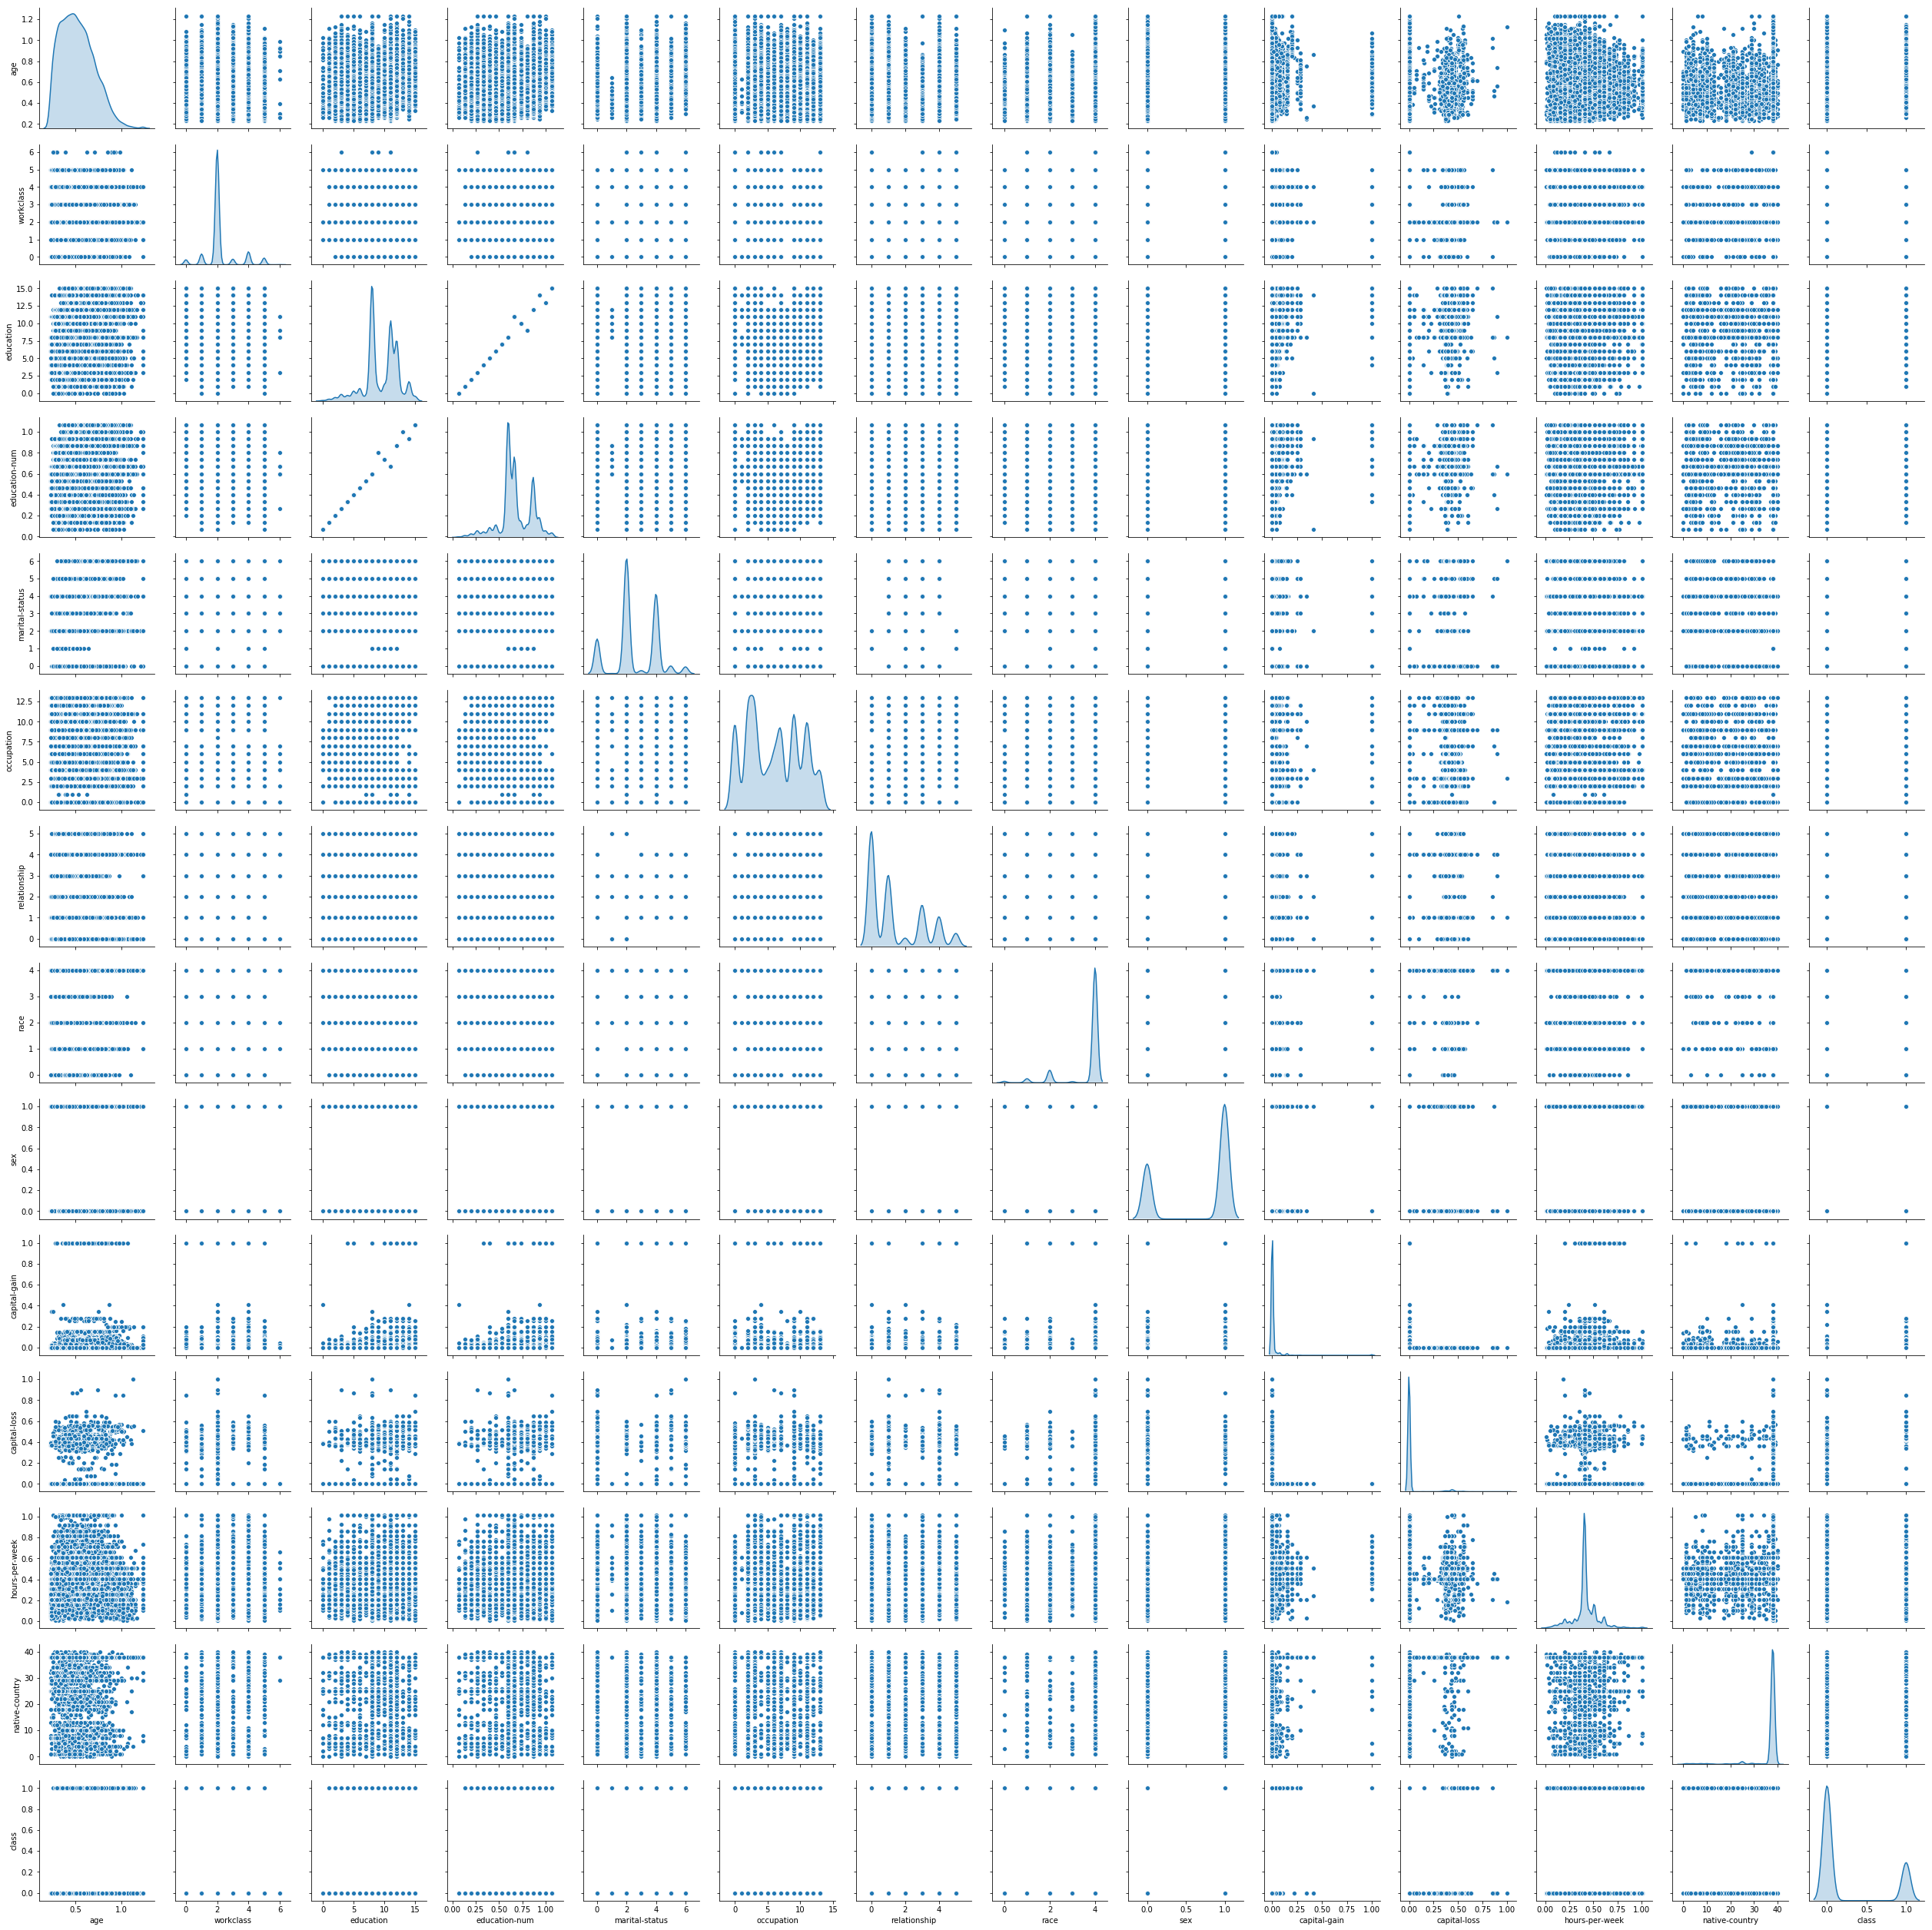

In [262]:
display(sns.pairplot(adult_encoded, diag_kind='kde'))

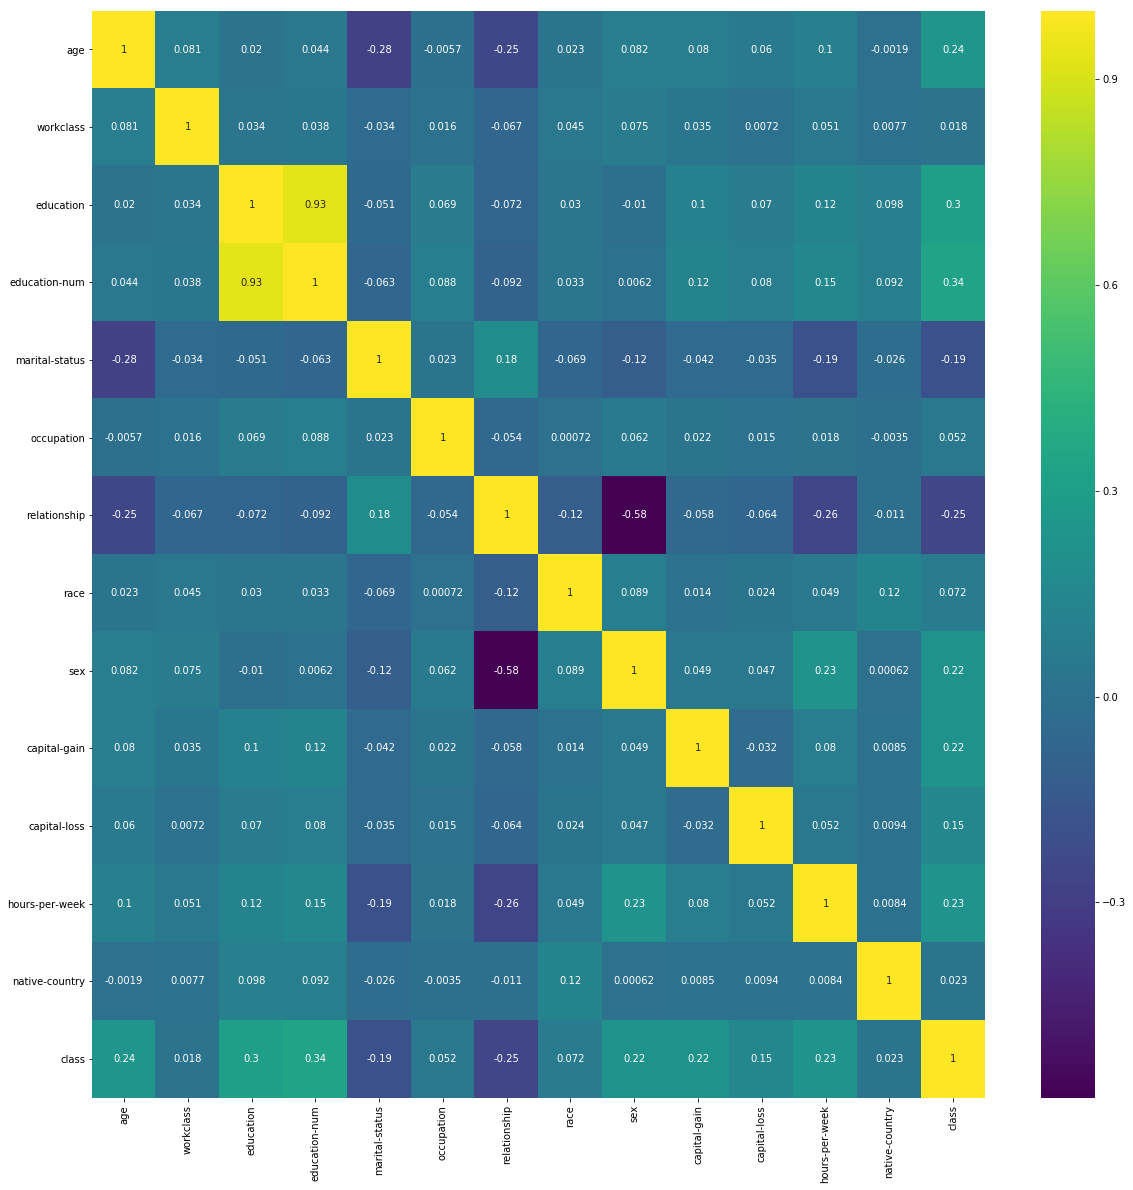

In [263]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(adult_encoded.corr(), annot=True, cmap='viridis', ax=ax)

c:\users\alberto blanco\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


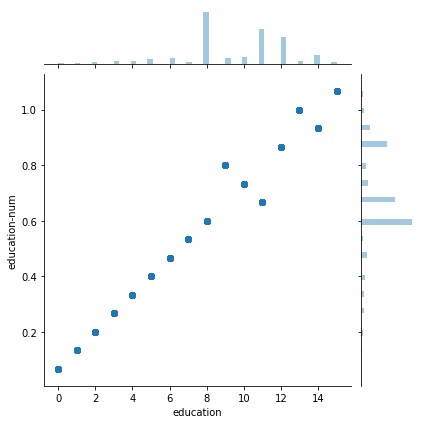

In [264]:
sns.jointplot(x="education", y="education-num", data=adult_encoded);

In [265]:
# education & education_num are highly correlated 
# so we drop education (education_num is easier to handle)

#adult.drop('education', axis=1, inplace=True)
#adult.columns.values

In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


display(adult.head())
enc = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', [0, 3, 9, 10, 11]),
        #('num', 'passthrough', [0, 2, 8, 9, 10]),
        ('cat', OneHotEncoder(), [1, 2, 4, 5, 6, 7, 8, 12]),])
        #('cat', OneHotEncoder(), [1, 3, 4, 5, 6, 7, 11]),])
        #('label', LabelEncoder(), 13)])

enc.fit(adult)

age         workclass  education  education-num      marital-status  \
0  0.534247         State-gov  Bachelors       0.866667       Never-married   
1  0.684932  Self-emp-not-inc  Bachelors       0.866667  Married-civ-spouse   
2  0.520548           Private    HS-grad       0.600000            Divorced   
3  0.726027           Private       11th       0.466667  Married-civ-spouse   
4  0.383562           Private  Bachelors       0.866667  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male       0.02174   
1    Exec-managerial        Husband  White    Male       0.00000   
2  Handlers-cleaners  Not-in-family  White    Male       0.00000   
3  Handlers-cleaners        Husband  Black    Male       0.00000   
4     Prof-specialty           Wife  Black  Female       0.00000   

   capital-loss  hours-per-week native-country  class  
0           0.0        0.408163  United-States  <=50K  
1           0.0        0.132653  United-States  <=50K  
2           0.0        0.408163  United-States  <=50K  
3           0.0        0.408163  United-States  <=50K  
4           0.0        0.408163           Cuba  <=50K

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num', 'passthrough', [0, 3, 9, 10, 11]),
                                ('cat',
                                 OneHotEncoder(categorical_features=None,
                                               categories=None, drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               n_values=None, sparse=True),
                                 [1, 2, 4, 5, 6, 7, 8, 12])],
                  verbose=False)

In [293]:
display(np.array(enc.transform(adult.iloc[[1]])))

array(<1x103 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>, dtype=object)

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(adult.drop('class', axis=1), adult['class'], test_size=0.33, random_state=42)

In [268]:
# Load semantic distances from files

import os
import collections

path = './datasets/semdist/ontodistnolog/'
#path = './datasets/semdist/ontodist/'
#path = './datasets/semdist/embedist/'
categorical_attributes = list(adult.select_dtypes(['category']).columns.values)
categorical_attributes = categorical_attributes[:-1]

distances = {}
for categorical_attribute in categorical_attributes:
    with open(path+categorical_attribute+'.txt') as f:
        contents = list(f)
        categories = list(map(str.strip, contents[0].split(',')))
        m = []
        for line in contents[1:]:
            m.append(list(map(float, map(str.strip, line.split(',')))))
        d = collections.defaultdict(dict)
        for i in range(len(categories)):
            for j in range(len(categories)):
                d[categories[i]][categories[j]] = m[i][j]
        distances[categorical_attribute] = d

In [269]:
# Distance computation function


In [270]:
import math

# current best results embedist/weight/nosquare
def dist_attr(x, y, attr_pos, categorical_mask, column_names):
    if categorical_mask[attr_pos]:
        #return 0.625 * distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]**2
        #return distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]**2
        #return 0.625 * distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]
        return distances[column_names[attr_pos]][x[attr_pos]][y[attr_pos]]
    else:
        #return (float(x[attr_pos]) - float(y[attr_pos]))**2
        return abs(float(x[attr_pos]) - float(y[attr_pos]))

def dist_record(x, y):
    d = []
    categorical_mask = [0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
    #categorical_mask = [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]
    column_names = list(adult.columns.values)[:-1]
    for i in range(len(column_names)):
        d.append(dist_attr(x, y, i, categorical_mask, column_names))
    
    #return float(math.sqrt(sum(d)))
    return float(sum(d))
    
def mean_record(D):
    d = []
    # 0->age 
    d.append(float(np.mean(D[:,0])))
    # 1->workclass  
    d.append(mean_semantic(D[:,1], 'workclass'))
    # 2->education 
    d.append(mean_semantic(D[:,2], 'education'))
    # 3->education-num   
    d.append(float(np.mean(D[:,3])))
    # 4->marital-status  
    d.append(mean_semantic(D[:,4], 'marital-status'))
    # 5->occupation  
    d.append(mean_semantic(D[:,5], 'occupation'))
    # 6->relationship 
    d.append(mean_semantic(D[:,6], 'relationship'))
    # 7->race    
    d.append(mean_semantic(D[:,7], 'race'))
    # 8->sex  
    d.append(mean_semantic(D[:,8], 'sex'))
    # 9->capital-gain  
    d.append(float(np.mean(D[:,9])))
    #10->capital-loss 
    d.append(float(np.mean(D[:,10])))
    #11->hours-per-week 
    d.append(float(np.mean(D[:,11])))
    #12->native-country  
    d.append(mean_semantic(D[:,12], 'native-country'))
    
    return d
    
def mean_semantic(values, attribute_name):
    candidates = list(distances[attribute_name].keys())
    return values[np.argmin([sum([distances[attribute_name][c][v] for c in candidates]) for v in values])]

def dist(x,y):
    return np.linalg.norm(x-y)
    #return scipy.spatial.distance.correlation(x,y)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k):
    c = [p]
    D = np.column_stack((X,[dist_record(v[:-1],p[:-1]) for v in X]))
    D = D[D[:,-1].argsort()]
    D = np.delete(D, -1, 1)
    c.extend(D[:k-1])
    D = D[k-1:]
    
    xc = np.array([p[:-1] for p in c], copy=False, ndmin=2)
    yc = np.array([p[-1] for p in c], copy=False)
    cl = (xc, yc)
    return D, cl
    
def mdav(X, y, k):
    D = np.column_stack((X,y))
    clusters = []
    while len(D) >= 3*k:
        # Centroid
        xm = mean_record(D)
        # Furthest from centroid
        xri = np.argmax([dist_record(v[:-1],xm) for v in D])
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        xsi = np.argmax([dist_record(v[:-1],xr[:-1]) for v in D])
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k)
        clusters.append(c)
        #cluster of xs
        D, c = cluster(D, xs, k)
        clusters.append(c)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = mean_record(D)
        # Furthest from centroid
        xri = np.argmax([dist_record(v[:-1],xm) for v in D])
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k)
        clusters.append(c)
        
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)     
    else:
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)
    
    centroids = np.array([mean_record(c[0]) for c in clusters], copy=False)
    
    return clusters, centroids

from sklearn import tree
def gen_explanations(clustering, max_depth=-1):
    explanations = []
    for cluster in clustering:
        # Testing with max depth
        if max_depth < 1:
            exp = tree.DecisionTreeClassifier()
        else:
            exp = tree.DecisionTreeClassifier(max_depth=max_depth)
        exp.fit(enc.transform(cluster[0]),cluster[1])
        explanations.append(exp) 
    return explanations

def pre_explanations(explanations, centroids, X):
    predictions = []
    for sample in X:
        #select the closest classifier
        exp = explanations[np.argmin([dist_record(sample,c) for c in centroids])]
        #exp_pred = exp.predict([sample])
        exp_pred = exp.predict(enc.transform([sample]))
        predictions.append(exp_pred[0])
    return predictions

def pre_explanations_ext(explanations, centroids, X, T, n):
    predictions = []
    for sample, truth in zip(X,T):
        #select the 3 closest classifiers
        mins = np.array([dist_record(sample,c) for c in centroids]).argsort()[:n]
        for m in mins:
            exp = explanations[m]
            #exp_pred = exp.predict([sample])
            exp_pred = exp.predict(enc.transform([sample]))
            if(exp_pred[0] == truth):
                break
        predictions.append(exp_pred[0])
    return predictions

In [271]:
# Generate clusters for different representativities
representativity = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
K = [int(len(X_train)*r) for r in representativity]
clusterings = []
centroids_of_clusterings = []
for k in K:
    clustering, centroids = mdav(X_train, y_train, k)
    clusterings.append(clustering)
    centroids_of_clusterings.append(centroids)    

In [272]:
# Train explanations
clu_explanations = []
for clustering in clusterings:
    # Test shallow trees depht=4
    explanations = gen_explanations(clustering, 4)
    clu_explanations.append(explanations)

In [273]:
# Train blackbox model
from sklearn.neural_network import MLPClassifier
blackbox = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
blackbox.fit(enc.transform(X_train), y_train)
display(blackbox.score(enc.transform(X_test), y_test))

Iteration 1, loss = 0.57705508
Iteration 2, loss = 0.52930086
Iteration 3, loss = 0.49680667
Iteration 4, loss = 0.46915602
Iteration 5, loss = 0.44768357
Iteration 6, loss = 0.43197290
Iteration 7, loss = 0.42038122
Iteration 8, loss = 0.41124603
Iteration 9, loss = 0.40387364
Iteration 10, loss = 0.39756847
Iteration 11, loss = 0.39224810
Iteration 12, loss = 0.38792035
Iteration 13, loss = 0.38433018
Iteration 14, loss = 0.38127270
Iteration 15, loss = 0.37869095
Iteration 16, loss = 0.37592755
Iteration 17, loss = 0.37401537
Iteration 18, loss = 0.37182924
Iteration 19, loss = 0.37006655
Iteration 20, loss = 0.36854639
Iteration 21, loss = 0.36703616
Iteration 22, loss = 0.36558781
Iteration 23, loss = 0.36427398
Iteration 24, loss = 0.36310023
Iteration 25, loss = 0.36194671
Iteration 26, loss = 0.36087554
Iteration 27, loss = 0.35994250
Iteration 28, loss = 0.35882968
Iteration 29, loss = 0.35802934
Iteration 30, loss = 0.35717421
Iteration 31, loss = 0.35614698
Iteration 32, los

Iteration 253, loss = 0.30141841
Iteration 254, loss = 0.30117831
Iteration 255, loss = 0.30105685
Iteration 256, loss = 0.30158558
Iteration 257, loss = 0.30247730
Iteration 258, loss = 0.30055728
Iteration 259, loss = 0.30044400
Iteration 260, loss = 0.30061300
Iteration 261, loss = 0.30010543
Iteration 262, loss = 0.30056080
Iteration 263, loss = 0.29999580
Iteration 264, loss = 0.30028956
Iteration 265, loss = 0.29949875
Iteration 266, loss = 0.29907249
Iteration 267, loss = 0.29989414
Iteration 268, loss = 0.29979603
Iteration 269, loss = 0.29921246
Iteration 270, loss = 0.29947035
Iteration 271, loss = 0.29913849
Iteration 272, loss = 0.29909025
Iteration 273, loss = 0.29804723
Iteration 274, loss = 0.29817408
Iteration 275, loss = 0.29771121
Iteration 276, loss = 0.29758593
Iteration 277, loss = 0.29897297
Iteration 278, loss = 0.29803378
Iteration 279, loss = 0.29910224
Iteration 280, loss = 0.29874724
Iteration 281, loss = 0.29730553
Iteration 282, loss = 0.29711184
Iteration 

c:\users\alberto blanco\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8466947960618847

In [274]:
# Train big tree
surrogate = tree.DecisionTreeClassifier()
surrogate.fit(enc.transform(X_train),y_train)
display(surrogate.score(enc.transform(X_test), y_test))
display(surrogate.tree_.node_count)

0.8169580068314245

7165

In [275]:
truth = y_test
blackbox_predictions = blackbox.predict(enc.transform(X_test))
surrogate_predictions = surrogate.predict(enc.transform(X_test))
explanation_predictions = []
explanation_ext_predictions = []
for i in range(len(clu_explanations)):
    p = pre_explanations(clu_explanations[i], centroids_of_clusterings[i], np.array(X_test))
    q = pre_explanations_ext(clu_explanations[i], centroids_of_clusterings[i], np.array(X_test), blackbox_predictions, 3)
    explanation_predictions.append(p)
    explanation_ext_predictions.append(q)

In [279]:
# acc = TP+TN/all
acc_blackbox = np.mean([t==p for t,p in zip(truth, blackbox_predictions)])
acc_surrogate = np.mean([t==p for t,p in zip(truth, surrogate_predictions)])
acc_explanations = []
for i in range(len(explanation_predictions)):
    acc_explanations.append(np.mean([t==p for t,p in zip(truth, explanation_predictions[i])]))
    
acc_explanations_ext = []
for i in range(len(explanation_ext_predictions)):
    acc_explanations_ext.append(np.mean([t==p for t,p in zip(truth, explanation_ext_predictions[i])]))

acc_cross = []
for i in range(len(explanation_predictions)):
    acc_cross.append(np.mean([t==p for t,p in zip(blackbox_predictions, explanation_predictions[i])]))

acc_cross_ext = []
for i in range(len(explanation_predictions)):
    acc_cross_ext.append(np.mean([t==p for t,p in zip(blackbox_predictions, explanation_ext_predictions[i])]))

display(acc_blackbox)
display(acc_explanations)
display(acc_explanations_ext)
display(acc_cross)
display(acc_cross_ext)

0.8466947960618847

[0.7749648382559775,
 0.75708257986739,
 0.7906369298774362,
 0.7858147478400643,
 0.737894313843681,
 0.8050030138637734,
 0.8162547719509745,
 0.8319268635724332,
 0.8288125376732972,
 0.8371508941129194,
 0.8428772352822985,
 0.8377536668675909,
 0.8255977496483825]

[0.8430781595338558,
 0.8424753867791842,
 0.8477998794454491,
 0.8386578259995981,
 0.8516174402250352,
 0.8435804701627486,
 0.8474984930681133,
 0.8500100462125778,
 0.8487040385774564,
 0.8517179023508138,
 0.8517179023508138,
 0.845187864175206,
 0.8449869399236488]

[0.8193690978501105,
 0.7838055053244927,
 0.8314245529435403,
 0.818766325095439,
 0.7714486638537271,
 0.8449869399236488,
 0.8500100462125778,
 0.8642756680731364,
 0.8555354631303999,
 0.8795459111914808,
 0.8830620855937311,
 0.8865782599959815,
 0.8669881454691581]

[0.9722724532851115,
 0.9576049829214386,
 0.9615230058268033,
 0.9495680128591522,
 0.9643359453486036,
 0.9753867791842475,
 0.9748844685553546,
 0.933996383363472,
 0.9132007233273056,
 0.9162145871006631,
 0.9162145871006631,
 0.9343982318665863,
 0.9341973076150292]

In [280]:
min_nodes = []
max_nodes = []
mean_nodes = []
median_nodes = []
n_counts = []
for explanations in clu_explanations:
    node_counts = [exp.tree_.node_count for exp in explanations]
    n_counts.append(node_counts)
    min_nodes.append(np.min(node_counts))
    max_nodes.append(np.max(node_counts))
    mean_nodes.append(np.mean(node_counts))
    median_nodes.append(np.median(node_counts))

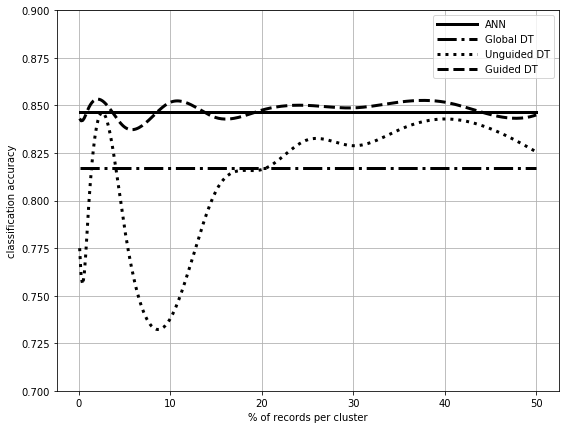

In [281]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

representativity = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
representativity = list([r*100 for r in representativity])

xnew = np.linspace(min(representativity),max(representativity),300)
spl = make_interp_spline(representativity, acc_explanations, k=3) #BSpline object
ynew = spl(xnew)

spl = make_interp_spline(representativity, acc_explanations_ext, k=3) #BSpline object
ynew4 = spl(xnew)

acc_blackbox_const = [acc_blackbox]*len(representativity)
spl = make_interp_spline(representativity, acc_blackbox_const, k=3) #BSpline object
ynew2 = spl(xnew)

big_tree = [acc_surrogate]*len(representativity)
spl = make_interp_spline(representativity, big_tree, k=3) #BSpline object
ynew6 = spl(xnew)

spl = make_interp_spline(representativity, acc_cross, k=3) #BSpline object
ynew3 = spl(xnew)

spl = make_interp_spline(representativity, acc_cross_ext, k=3) #BSpline object
ynew5 = spl(xnew)

plt.figure(figsize=(9,7))
plt.plot(xnew,ynew2,linestyle='-',linewidth=3,color='k',label='ANN')
plt.plot(xnew,ynew6,linestyle='-.',linewidth=3,color='k',label='Global DT')
plt.plot(xnew,ynew,linestyle=':',linewidth=3,color='k',label='Unguided DT')
#plt.plot(xnew,ynew3, label='interpretable w.r.t. blackbox')
plt.plot(xnew,ynew4,linestyle='--',linewidth=3,color='k',label='Guided DT')

#plt.plot(xnew,ynew5, label='interpretable-guided w.r.t. blackbox')


plt.legend(handlelength=4)
plt.ylim(0.7,0.9)
plt.xlabel('% of records per cluster')
plt.ylabel('classification accuracy')
plt.grid()
plt.show()
plt.close()

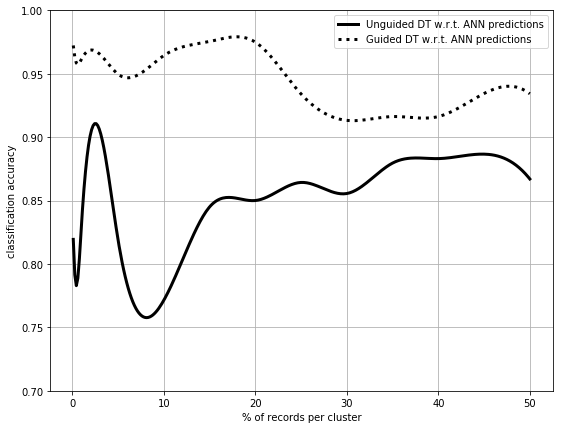

In [282]:
plt.figure(figsize=(9,7))
##plt.plot(xnew,ynew2, label='blackbox')
##plt.plot(xnew,ynew, label='interpretable')
plt.plot(xnew,ynew3,linestyle='-',linewidth=3,color='k',label='Unguided DT w.r.t. ANN predictions')
##plt.plot(xnew,ynew4, label='interpretable-guided')
plt.plot(xnew,ynew5,linestyle=':',linewidth=3,color='k',label='Guided DT w.r.t. ANN predictions')

plt.legend()
plt.ylim(0.7,1)
plt.xlabel('% of records per cluster')
plt.ylabel('classification accuracy')
plt.grid()
plt.show()
plt.close()

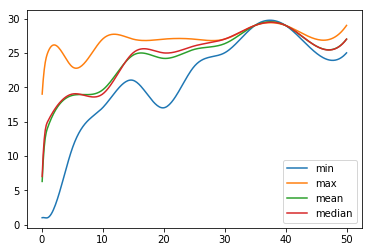

In [283]:
plt.plot(xnew,make_interp_spline(representativity, min_nodes, k=3)(xnew),label='min')
plt.plot(xnew,make_interp_spline(representativity, max_nodes, k=3)(xnew),label='max')
plt.plot(xnew,make_interp_spline(representativity, mean_nodes, k=3)(xnew),label='mean')
plt.plot(xnew,make_interp_spline(representativity, median_nodes, k=3)(xnew),label='median')
plt.legend()
plt.show()
plt.close()

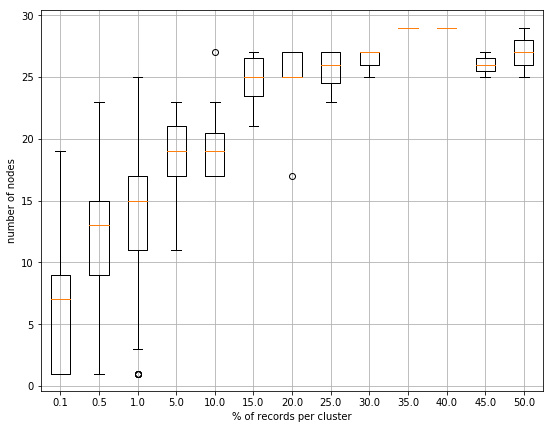

In [284]:
plt.figure(figsize=(9,7))
plt.boxplot(n_counts)
locs, _ = plt.xticks()
plt.xticks(locs, representativity)
#plt.yscale('log')
plt.xlabel('% of records per cluster')
plt.ylabel('number of nodes')
#plt.ylabel('number of nodes (log scale)')
plt.grid()
plt.show()
plt.close()

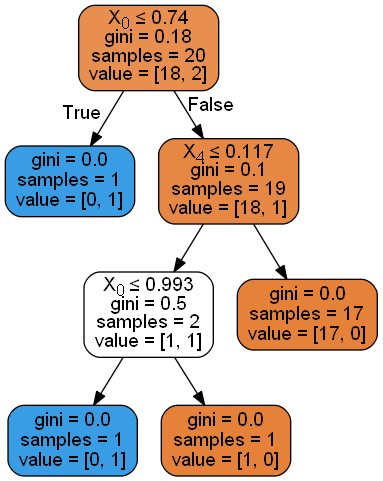

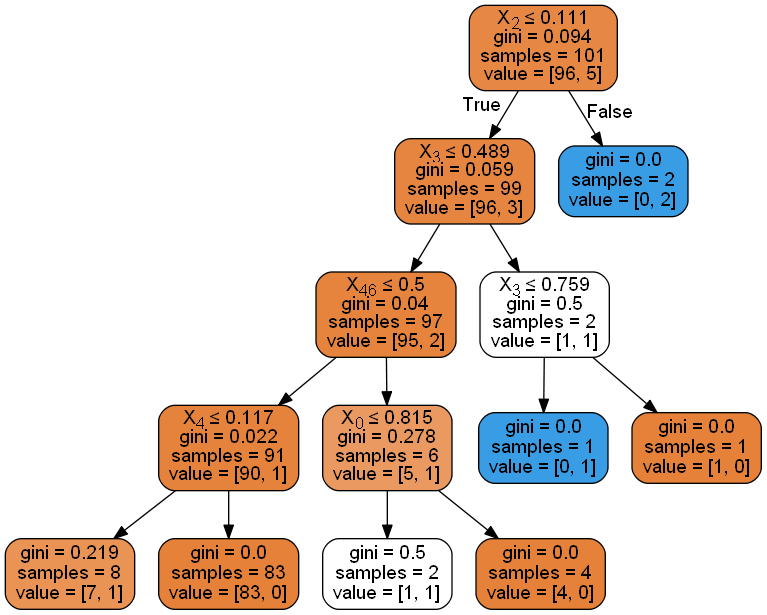

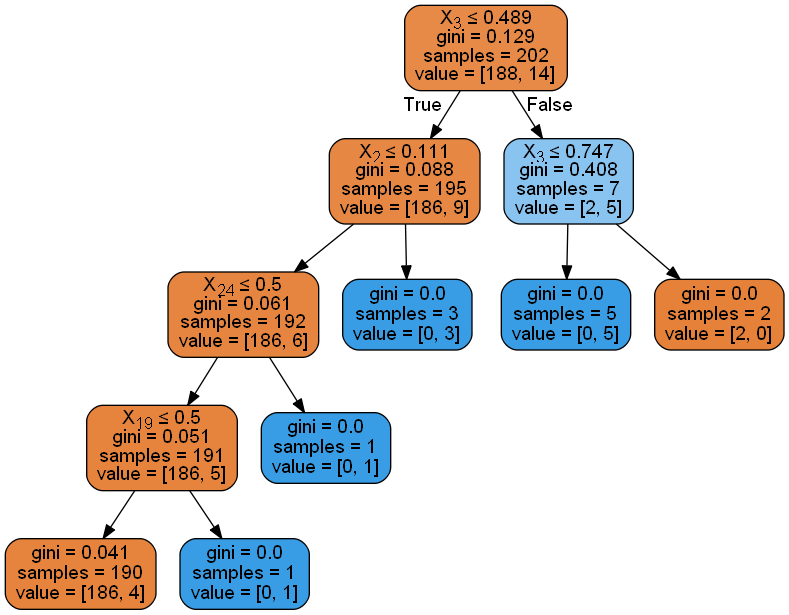

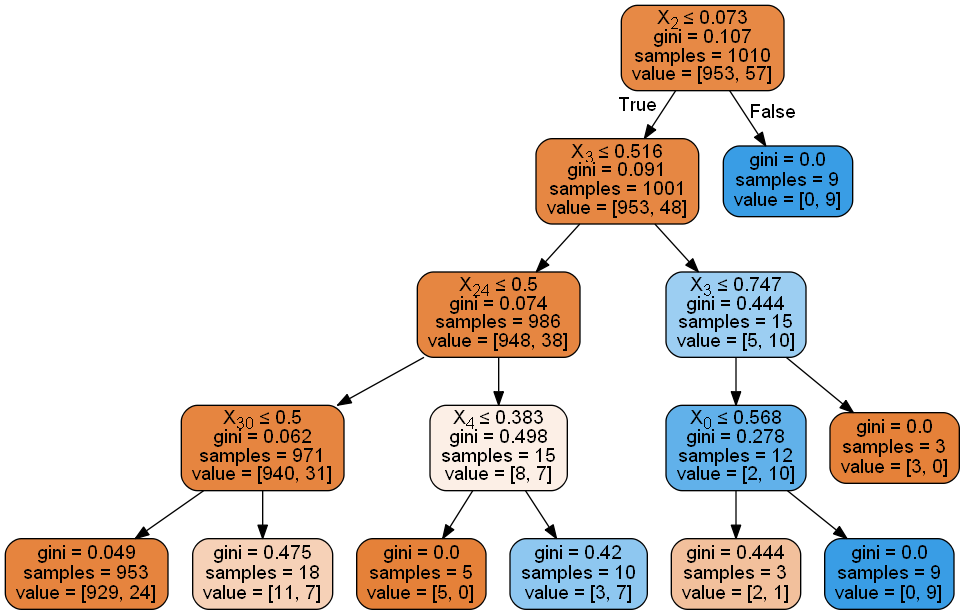

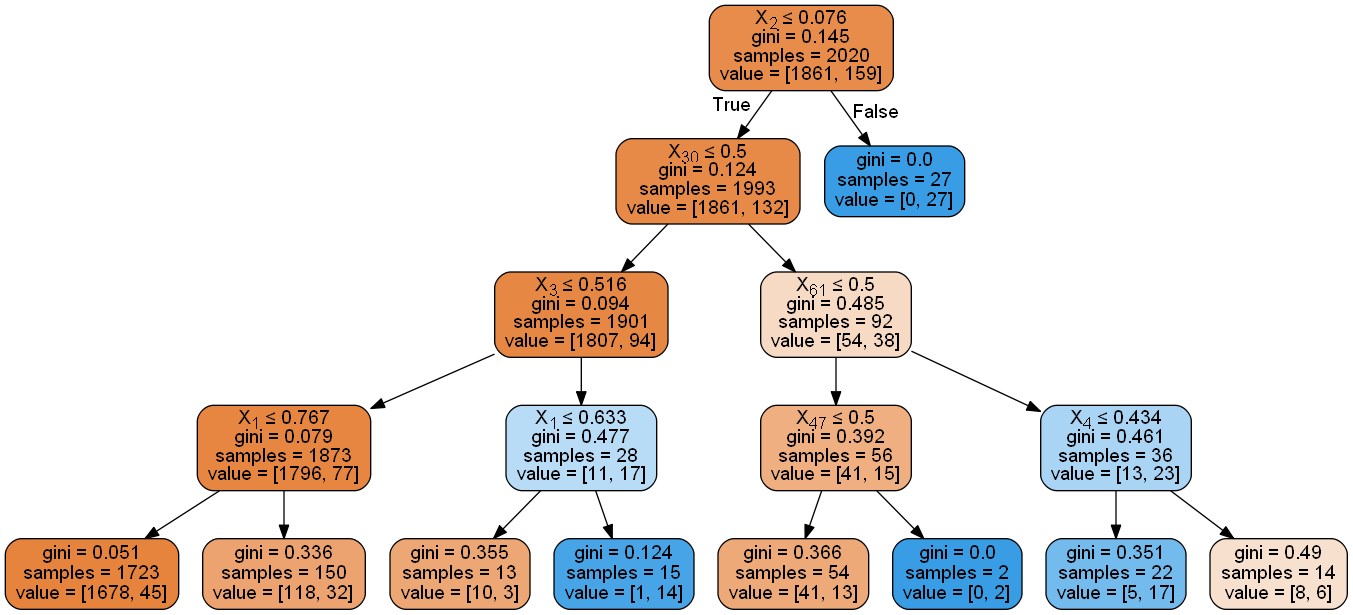

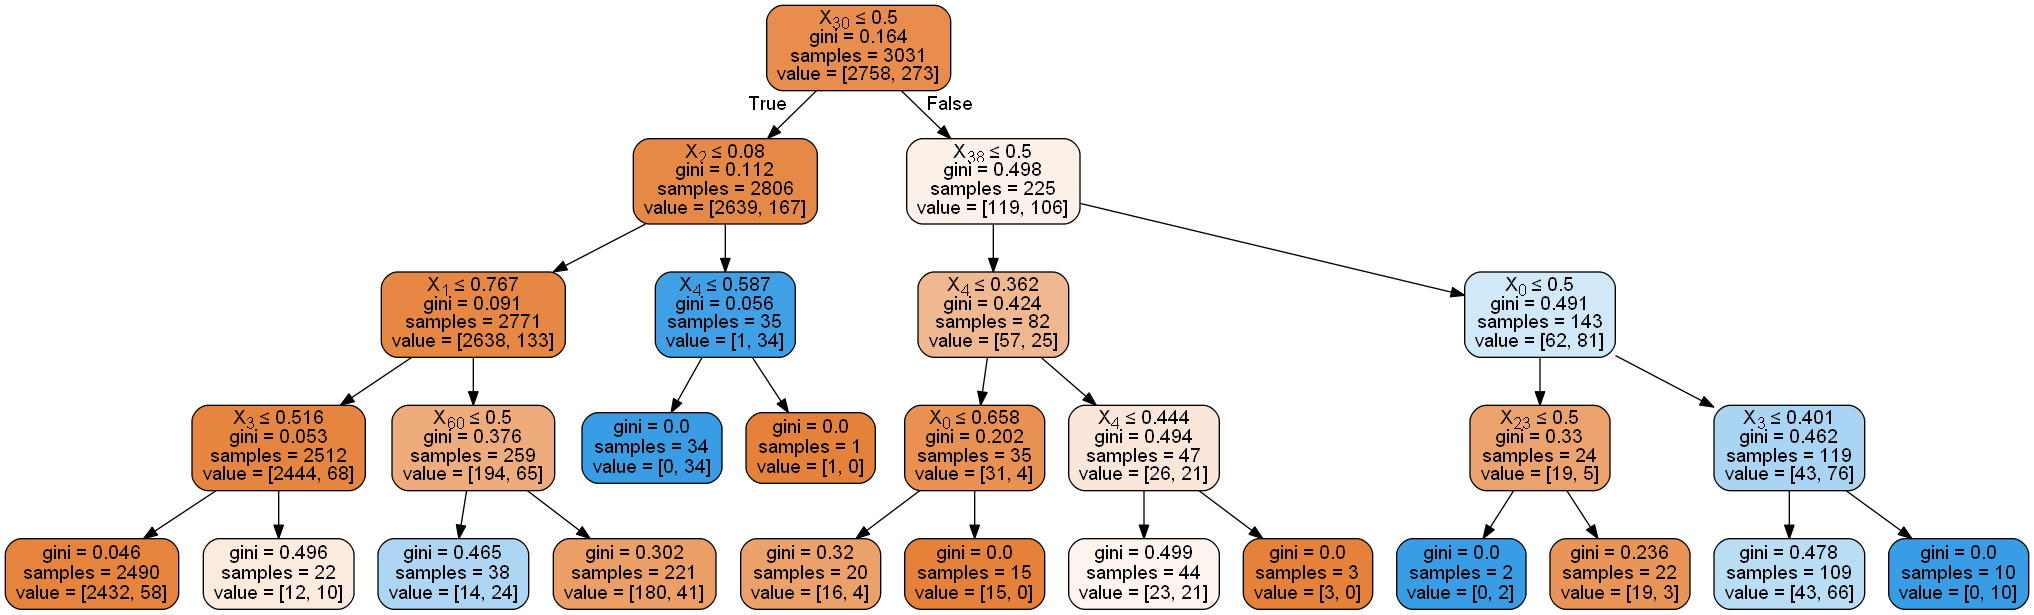

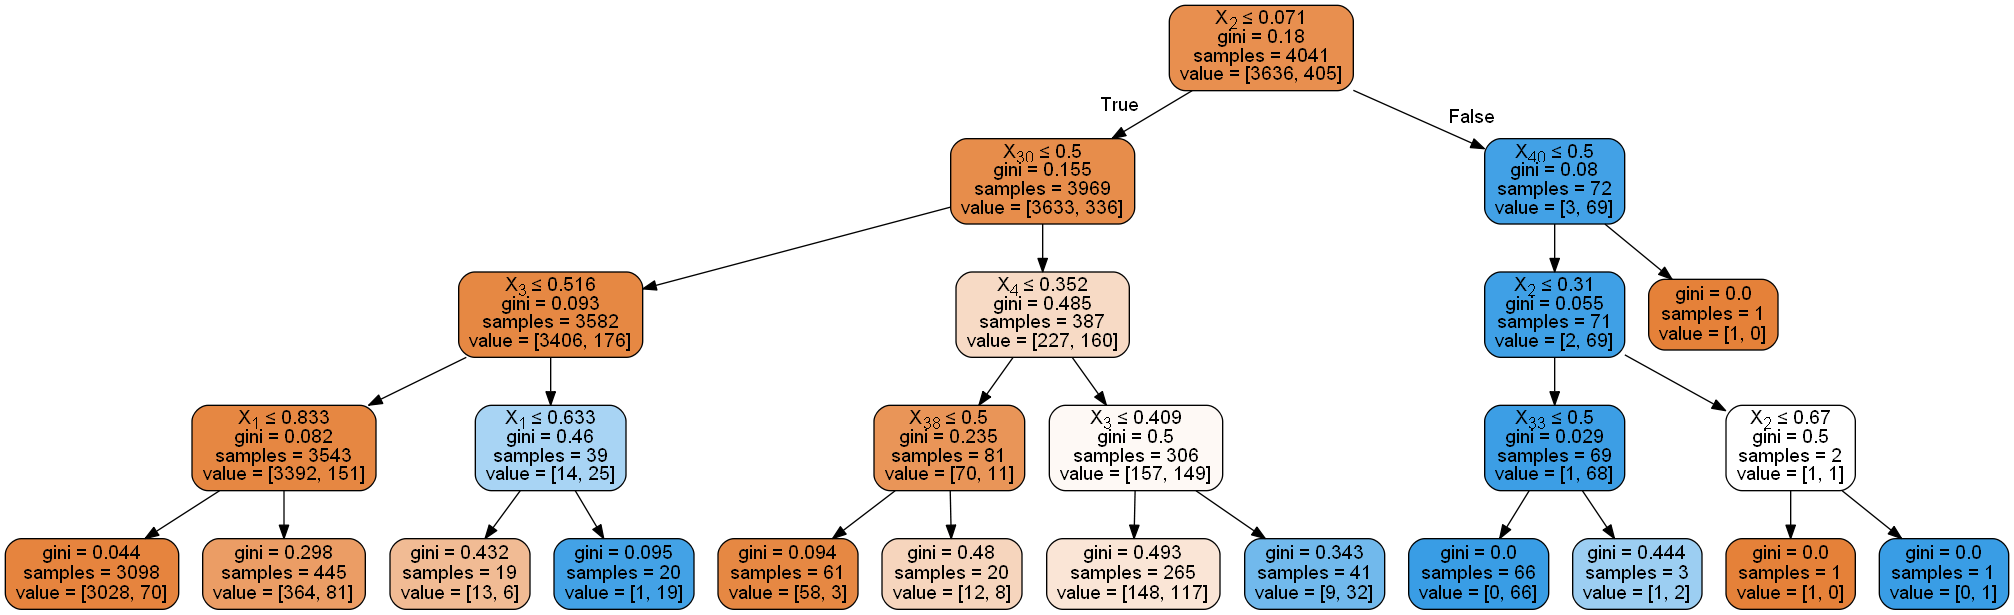

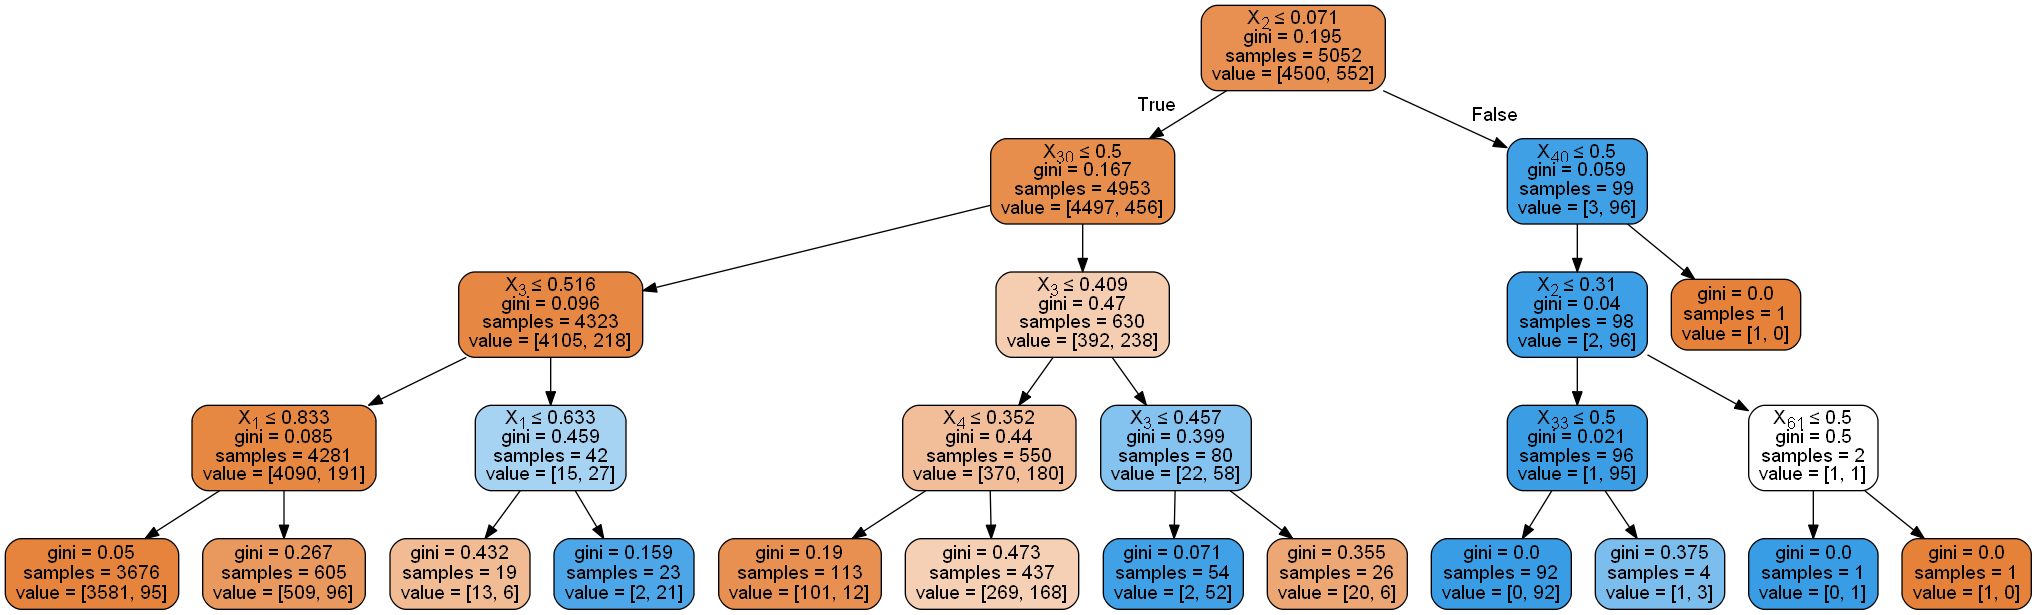

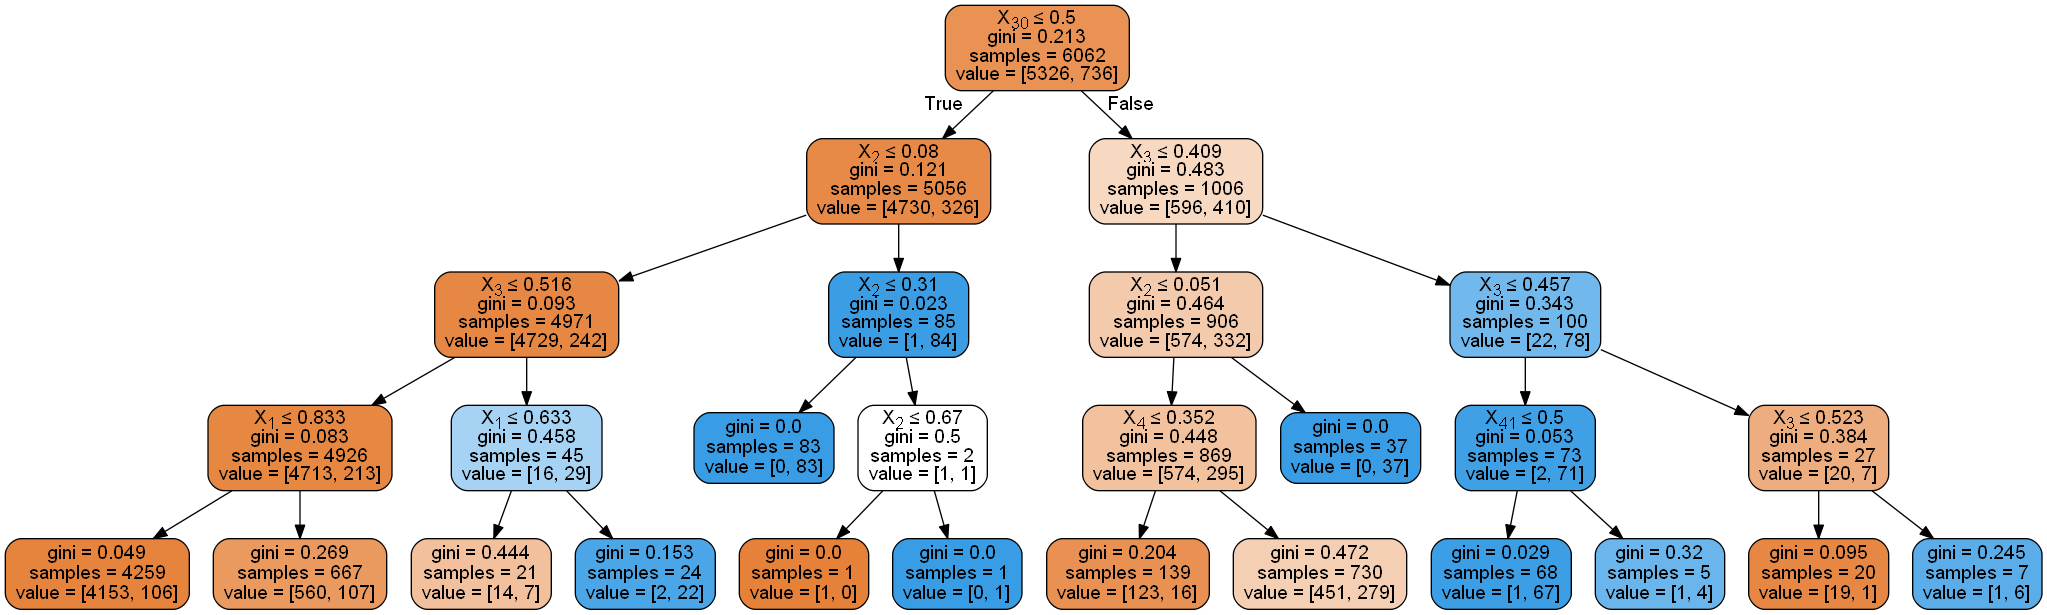

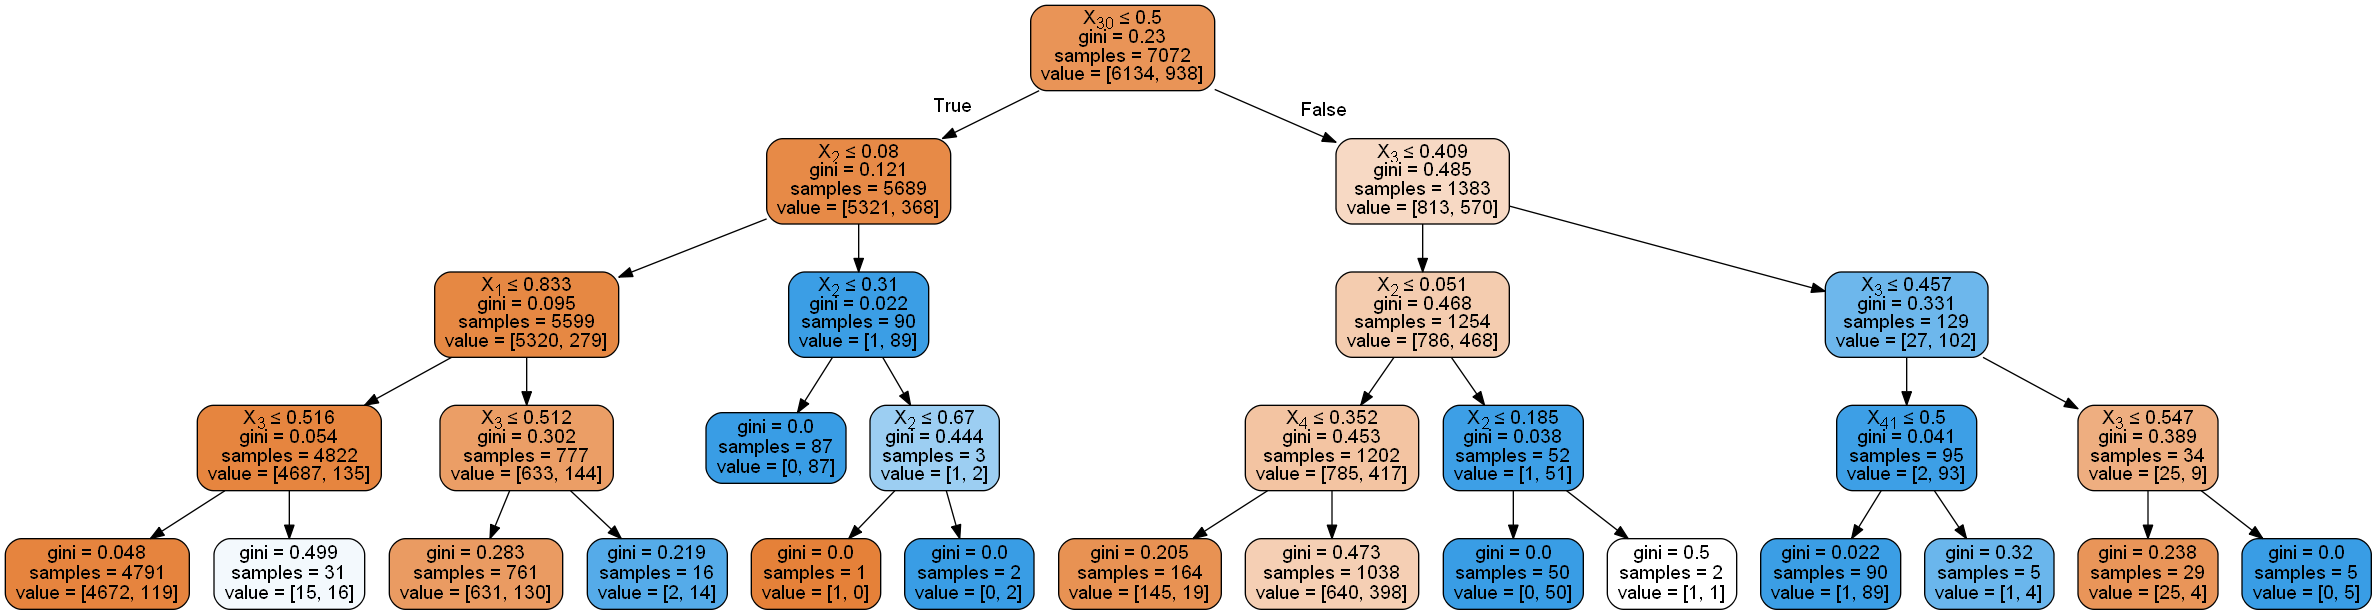

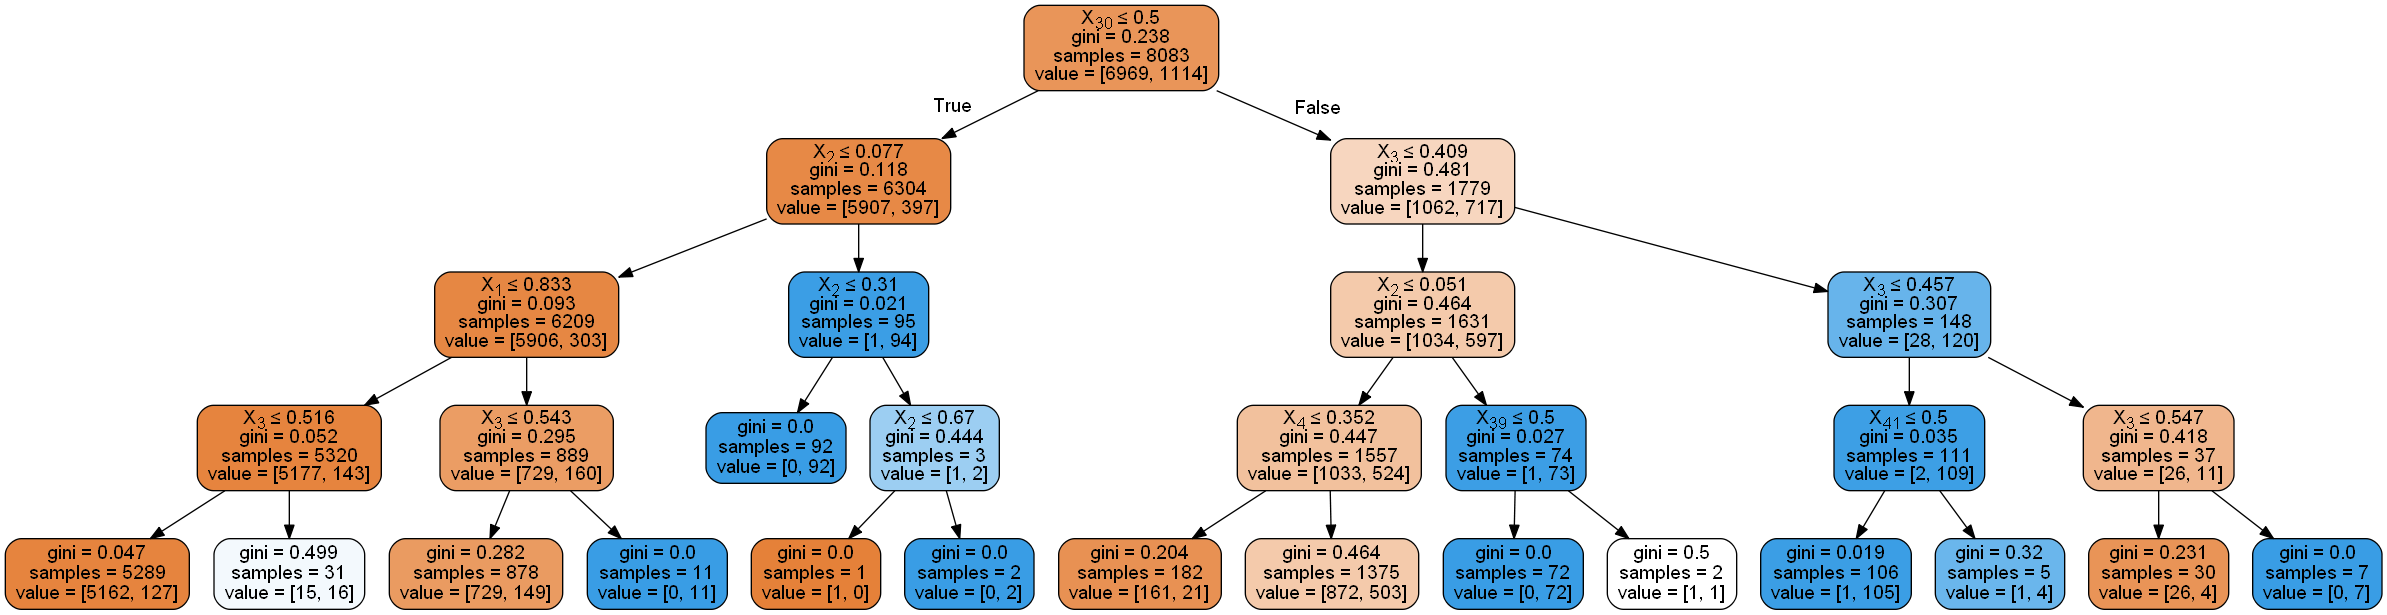

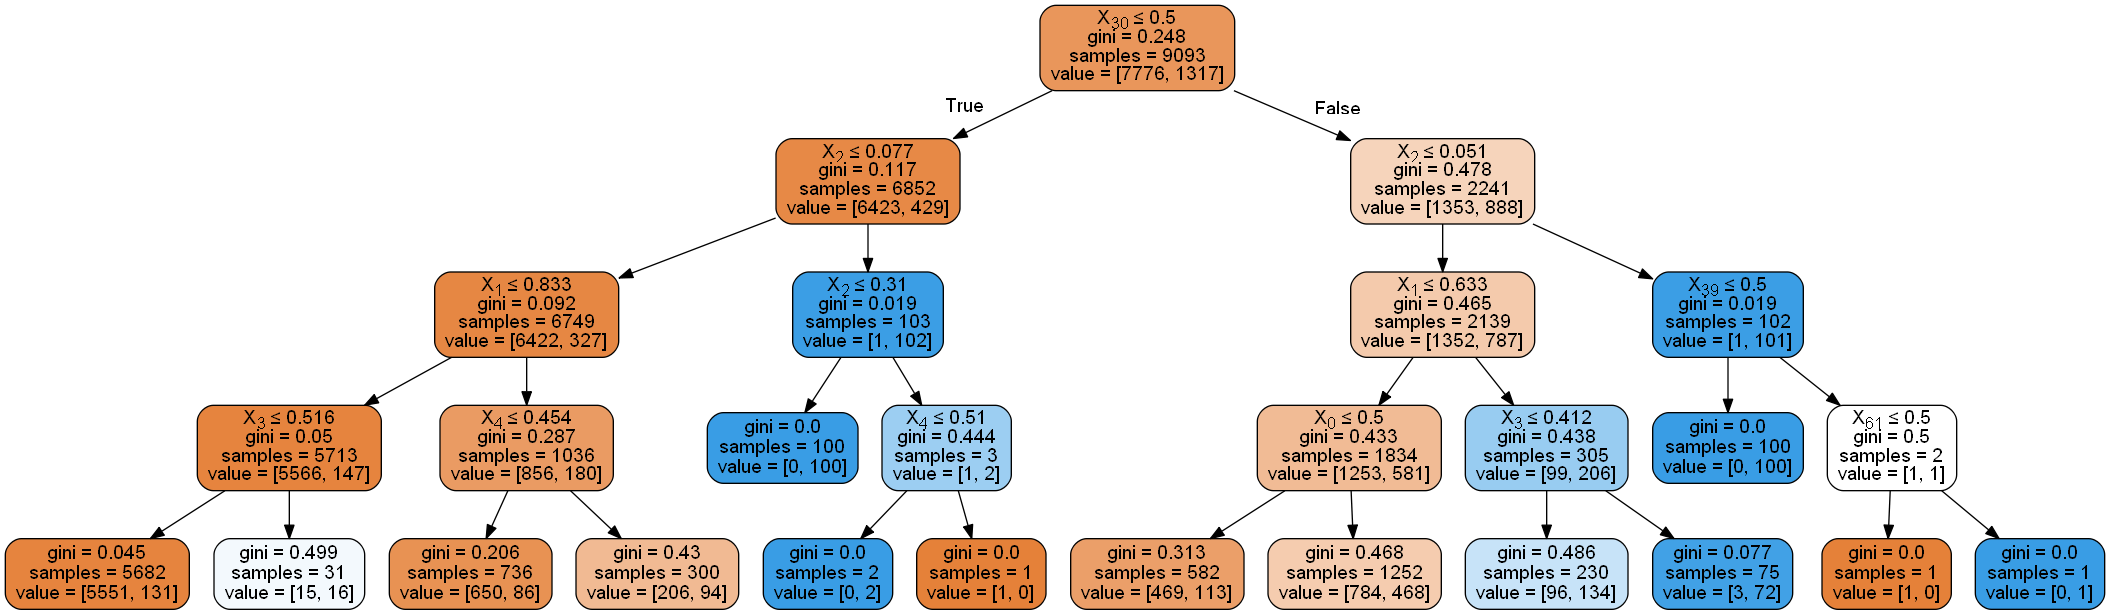

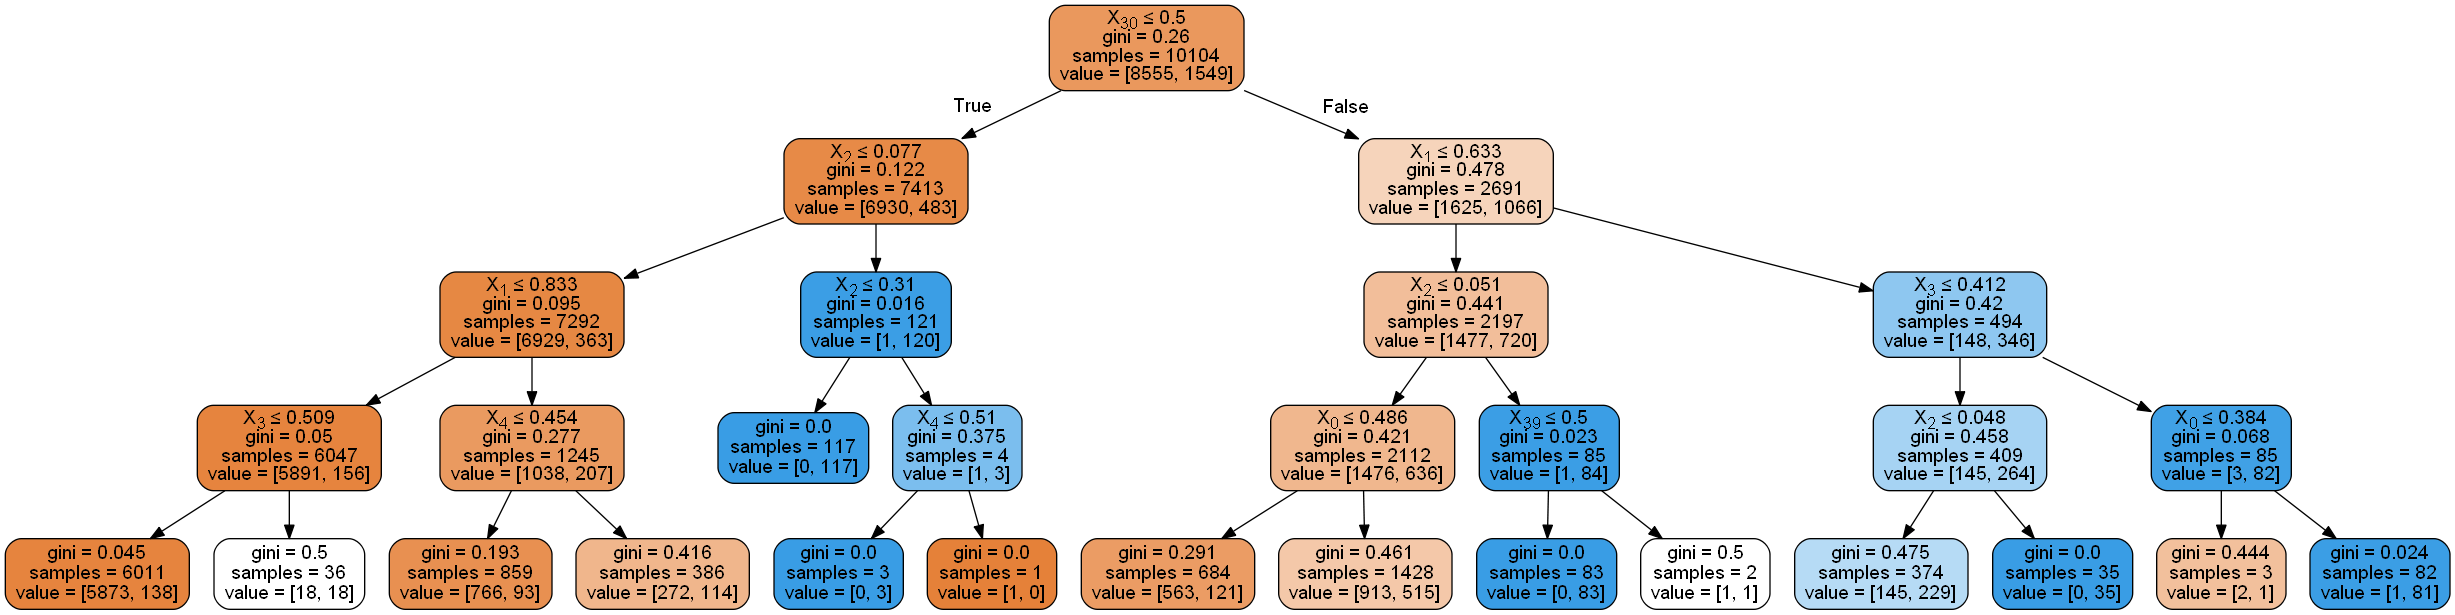

In [286]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

for clu_explanation in clu_explanations:
    dot_data = StringIO()
    export_graphviz(clu_explanation[0], out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

    